In [12]:
from hydroDL import kPath

import rasterio
from rasterio.plot import show
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt

import numpy as np
import os

In [13]:
# import random tif
rnn_map_dir = os.path.join(kPath.dirVeg, 'rnn_map')
tif_name = os.listdir(rnn_map_dir)[0]

tif_path = os.path.join(rnn_map_dir, tif_name)
tif_path

'/Users/andyhuynh/Documents/lfmc/data/rnn_map/lfmc_map_2016-04-15.tif'

In [14]:
coordinate = (-118.678, 35.446)

In [19]:
with rasterio.open(tif_path) as src:
    row, col = src.index(coordinate[0], coordinate[1])
    lfmc_value = src.read(1)[row, col]

print(f"LFMC value at {coordinate}: {lfmc_value}")

LFMC value at (-118.678, 35.446): 95


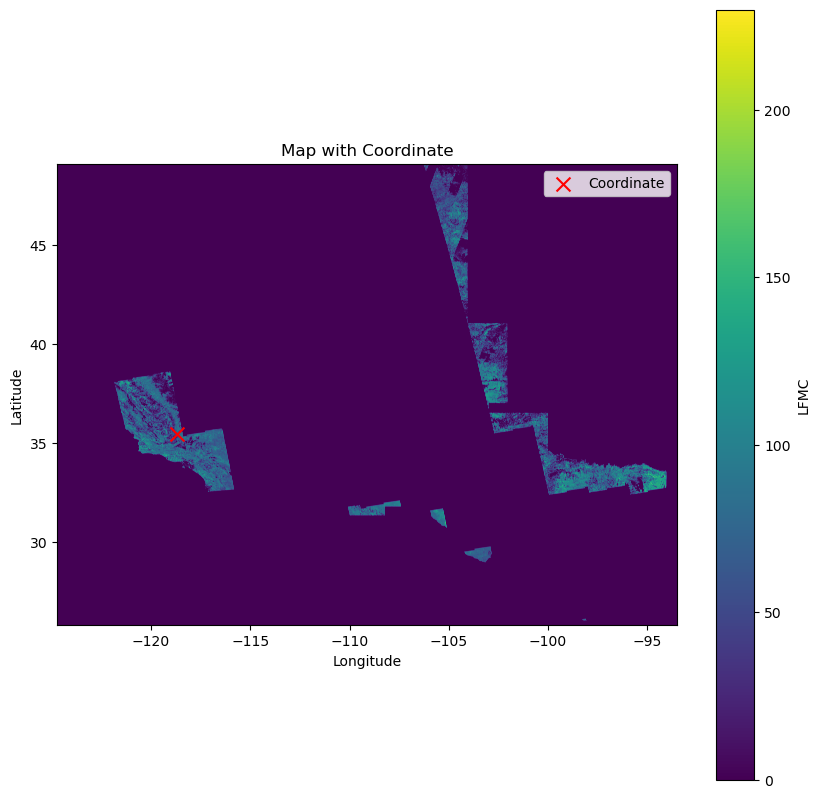

In [16]:
# Open the TIFF file
with rasterio.open(tif_path) as src:
    # Read the first band of the raster
    raster_data = src.read(1)
    transform = src.transform

# Plot the TIFF map
plt.figure(figsize=(10, 10))
plt.imshow(raster_data, cmap='viridis', extent=(src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top))
plt.colorbar(label='LFMC')

# Create a GeoDataFrame with the coordinate
gdf = gpd.GeoDataFrame([{'geometry': Point(coordinate[0], coordinate[1])}], crs="EPSG:4326")

# Reproject the GeoDataFrame to the raster's CRS
gdf = gdf.to_crs(src.crs)

# Extract the reprojected coordinate
x, y = gdf.geometry.x[0], gdf.geometry.y[0]

# Plot the coordinate on the map
plt.scatter(x, y, color='red', marker='x', s=100, label='Coordinate')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map with Coordinate')
plt.show()